# Lab 01

## By Alicia Rüegg, Jonas Huber, Arik Guggenheim


In [14]:
"""
Cluster artists based on the words in their lyrics
Data from kaggle
Format data with create_data_kaggle.py
"""

__author__ = 'don.tuggener@zhaw.ch'

import numpy
import pdb
import re
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt
from sklearn.feature_extraction import text
from scipy import mean

%matplotlib inline

def plot_dendrogram(clustered, artists):
   """ Plot a dendrogram from the hierarchical clustering of the artist lyrics """
   plt.figure(figsize=(10, 25))
   #plt.figure(figsize=(25, 10))
   plt.title('Hierarchical Clustering Dendrogram')
   plt.xlabel('Distance')  # this' but the label of the whole axis!
   plt.ylabel('Artists')
   plt.tight_layout()
   dendrogram(clustered,
           color_threshold=1.45,
           leaf_font_size=8.,  # font size for the x axis labels
           labels = artists,
           orientation = 'left',
           )
   plt.show()
   plt.clf()
    

def build_stop_word_list():
    return text.ENGLISH_STOP_WORDS.union(['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaooooooooooooooooooooh', 'aaaaaaaaaaaaaahhhhhhhhhhhhhh', 'aaaaaaaaaaaaooooooooooooooooooooooooooooooooeeeeeeeeeeeeeeooooooooo', 'aaaaaaaaaaah', 'aaaaaaaaaah', 'aaaaaaaah', 'aaaaaaahhhhhhhh', 'aaaaaaall', 'aaaaaagh', 'aaaaaah', 'aaaaaahhhh', 'aaaaaahhhhhhh', 'aaaaaal', 'aaaaaalright', 'aaaaaamen', 'aaaaaank', 'aaaaaannnnddd', 'aaaaagghh', 'aaaaah', 'aaaaahhhhhhhhhhhhh', 'aaaaggghhh', 'aaaah', 'aaaain', 'aaaall', 'aaaallll', 'aaaangs', 'aaaare', 'aaaargh', 'aaah', 'aaahhh', 'aaahhhggggrrr', 'aaahhhh', 'aaahhhhh', 'aaall', 'aaand', 'aaannnttt', 'aaate', 'aaawww', 'aaayyyyoooow', 'aah', 'aahh', 'aahhahah', 'aahhh', 'aahhhh'])
    


## Function for getting most used words per Artist


In [15]:
from IPython.display import display, Markdown

def words_per_artist(artist_lyrics, lyrics_tfidf_matrix, ix2word, n=10):
    """ 
    For each artist, print the most highly weighted words acc. to TF IDF 
    Print n words that are above the mean weight 
    """
    mean_weight = mean(lyrics_tfidf_matrix)
    print(mean_weight)
    artists = list(artist_lyrics.keys())
    tfidf_list = lyrics_tfidf_matrix.toarray()
    
    for cnt in range(len(artists)):
        lyric_elements = dict(zip(ix2word, tfidf_list[cnt]))
        words_over_mean = {k: v for k, v in lyric_elements.items() if v > mean_weight}
        words_sorted = sorted(words_over_mean, key=lyric_elements.get, reverse=True)
        artist_markdown = '* ### ' + artists[cnt] + '\n' + ', '.join(words_sorted[:n])
        display(Markdown(artist_markdown))


## Step 1

Loading all needed data from json files

In [16]:
import json

artist2genre = json.load(
    open('data/artist2genre_kaggle.json', 'r', encoding='utf-8'))
artist_lyrics = json.load(
    open('data/artist_lyrics_kaggle.json', 'r', encoding='utf-8'))
# Custom tokenization to remove numbers etc.
lyrics = [' '.join(re.findall('[A-Za-z]+', l))
            for l in artist_lyrics.values()]

## Vectorizing with TF IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the song lyrics
vectorizer = TfidfVectorizer(analyzer='word', stop_words=build_stop_word_list())
lyrics_tfidf_matrix = vectorizer.fit_transform(lyrics)
ix2word = vectorizer.get_feature_names()

## Get Distinct words per artist and cluster

In [18]:
words_per_artist(artist_lyrics, lyrics_tfidf_matrix, ix2word)


clustered = linkage(lyrics_tfidf_matrix.toarray(), method='ward')


0.00032724080280732476


* ### annihilator
ll, just, time, ve, don, phantasmagoria, alison, annihilator, got, hell

* ### busta-rhymes
niggas, nigga, shit, busta, yo, like, know, flipmode, rhymes, got

* ### crduan-xshadows
swims, gambit, eyes, love, heart, life, na, don, like, let

* ### fats-domino
love, don, baby, come, gonna, know, ll, oh, liza, home

* ### game
nigga, niggas, like, shit, fuck, got, compton, ain, bitch, don

* ### american-idol
love, know, don, oh, baby, just, like, ll, yeah, got

* ### dar-williams
know, like, love, ll, just, oh, time, don, say, said

* ### 50-cent
nigga, niggas, shit, like, got, don, ain, bitch, know, fuck

* ### amos-lee
know, oh, bau, gonna, ve, just, tm, don, love, wanna

* ### david-bowie
oh, love, don, ll, la, like, uh, just, ve, buh

* ### bobby-bare
ll, just, love, don, know, got, ve, man, time, like

* ### chamillionaire
chamillionaire, like, ya, know, nigga, got, ain, don, gon, just

* ### e-40
nigga, like, shit, niggas, got, bitch, know, ain, don, ass

* ### beirut
la, long, time, paused, ll, know, oh, smile, fe, leozinho

* ### clannad
na, ar, agus, mo, ag, gan, liom, bh, gur, ach

* ### chumbawamba
got, ll, don, just, timebomb, repeats, love, ve, know, world

* ### doris-day
love, sera, ll, la, heart, just, like, don, know, time

* ### andre-rieu
instrumental, america, oh, maastricht, diech, libiamo, amigos, love, kom, stad

* ### avicii
oh, love, ve, like, yeah, make, tell, superlove, don, way

* ### etta-james
oh, love, yeah, baby, got, don, know, want, ll, basement

* ### ella-fitzgerald
love, ll, just, oh, got, don, ve, know, heart, let

* ### city-and-colour
oh, know, love, don, come, ooh, like, life, ve, just

* ### armin-van-buuren
just, love, watching, bit, ll, dominator, little, don, sucker, know

* ### ernest-tubb
love, ll, just, ve, know, heart, don, time, got, dear

* ### curtis-mayfield
love, don, just, baby, worry, let, got, know, junkie, people

* ### ataraxia
ridi, et, novus, totus, laugh, la, questa, di, des, dans

* ### britney-spears
oh, baby, just, gimme, don, la, like, know, yeah, love

* ### cradle-of-filth
like, nymphetamine, lilith, death, dark, thy, danse, black, love, come

* ### everything-but-the-girl
love, don, know, like, want, time, just, ve, ll, deserts

* ### eric-clapton
love, don, baby, got, know, ve, gonna, time, chorus, just

* ### frank-zappa
vocals, keyboards, zappa, saxophone, guitar, bass, don, underwood, drums, percussion

* ### acid-drinkers
nie, don, like, mnie, wanna, jeste, just, si, ll, know

* ### bjrthrk
og, hann, bella, hn, thad, ekki, ad, vid, svo, hvad

* ### anthrax
don, ll, just, time, know, like, riggin, friggin, life, man

* ### bathory
death, blood, sky, sword, black, gods, just, ll, time, high

* ### aquabats
la, pi, ba, don, yam, got, meltdown, just, man, away

* ### bee-gees
love, don, know, ll, oh, got, just, life, like, baby

* ### dmx
niggas, nigga, niggaz, shit, fuck, gon, know, like, don, yo

* ### gordon-lightfoot
dee, love, borderstone, like, way, ll, time, day, don, katy

* ### chemical-brothers
lifting, ah, grover, like, don, bang, feel, control, just, superflash

* ### billie-holiday
love, ll, just, pom, heart, don, say, ve, know, like

* ### david-guetta
wanna, love, girl, oh, just, don, let, like, know, yeah

* ### bob-dylan
don, just, ll, like, got, know, gonna, love, come, oh

* ### 2pac
nigga, niggas, thug, got, fuck, don, like, ain, niggaz, ya

* ### cannibal-corpse
blood, dead, death, flesh, kill, life, body, gore, bodies, victims

* ### edith-piaf
les, et, le, je, dans, est, qui, il, la, qu

* ### buck-owens
love, ll, gonna, ve, don, like, know, just, beup, let

* ### enigma
sade, hosanna, moi, je, nomine, le, et, christi, donnes, es

* ### diana-ross
love, don, ll, just, know, baby, want, oh, like, ve

* ### bruce-springsteen
oh, baby, just, got, love, la, come, don, ll, night

* ### go-betweens
betweens, lyrics, don, karen, know, just, like, thing, right, way

* ### al-green
love, baby, oh, yeah, know, hey, time, la, just, let

* ### brian-mcknight
know, love, don, just, baby, girl, want, let, time, oh

* ### dean-martin
love, ll, chee, jl, dm, just, oh, don, like, heart

* ### chris-brown
girl, like, know, oh, nigga, got, love, don, baby, yeah

* ### dolly-parton
love, just, ll, know, oh, parton, don, ve, like, dolly

* ### elton-john
love, oh, just, like, don, ve, got, ll, know, time

* ### arrogant-worms
got, christmas, yeah, like, oh, canada, chomp, winnebago, manly, cause

* ### celine-dion
je, et, les, le, est, pas, des, que, moi, la

* ### ferlin-husky
love, ll, just, ve, oh, time, know, like, don, heart

* ### fall
man, don, like, just, bournemouth, got, time, stock, know, spinetrak

* ### angus-julia-stone
ll, don, love, pa, home, just, know, heart, like, want

* ### emmylou-harris
love, ll, don, just, like, know, oh, ve, heart, time

* ### aaron-neville
love, oh, don, know, baby, ll, let, just, angola, ve

* ### aretha-franklin
love, oh, baby, yeah, just, don, know, doo, jump, ain

* ### barbra-streisand
love, ll, don, know, just, like, barbra, ve, time, got

* ### devendra-banhart
know, la, love, amor, don, que, wah, like, el, oh

* ### diana-krall
love, just, know, ll, like, yeh, let, ve, way, don

* ### bobby-darin
love, know, come, ll, baby, just, like, don, oh, bailey

* ### fear-factory
life, eyes, live, walkaway, ve, new, don, away, kasso, flesh

* ### the-blood-brothers
johnstone, like, mrs, mickey, peacock, lyons, edward, linda, just, vital

* ### anti-flag
don, woah, oh, die, punk, ve, world, fuck, fucking, kill

* ### clancy-brothers
hurroo, roddy, rye, clancys, filename, rg, ll, old, toor, loora

* ### dusty-springfield
love, oh, baby, don, know, just, yeah, want, ll, ooh

* ### gary-numan
don, like, ve, ll, know, love, time, feel, just, say

* ### b-b-king
baby, love, know, don, oh, yes, got, just, ve, woman

* ### drake
niggas, nigga, like, shit, just, know, got, don, yeah, fuck

* ### celtic-woman
pum, shule, ina, ll, siuil, dong, nl, bheidh, christmas, agus

* ### bing-crosby
love, ll, pum, christmas, day, just, oh, la, like, come

* ### bill-miller
just, coyote, like, dreams, wind, ve, reservation, tumbleweed, heart, trail

* ### bill-anderson
love, just, ve, ll, don, know, like, time, little, anderson

* ### babyface
love, know, baby, don, girl, just, ll, hook, babyface, want

* ### elvis-costello
don, just, know, like, ll, oh, love, ve, say, want

* ### damien-rice
like, mooday, man, don, know, wanna, got, love, woman, ve

* ### akon
na, got, know, wanna, don, like, just, oh, cause, akon

* ### craig-cardiff
don, said, like, emm, things, say, know, ve, just, love

* ### eminem
like, shit, just, fuck, don, eminem, cause, bitch, got, know

* ### blind-guardian
ll, ba, don, ve, time, come, barbara, wo, guardian, shall

* ### frank-sinatra
love, ll, just, frank, like, know, come, ve, heart, don

* ### agoraphobic-nosebleed
fucking, fuckin, shit, necessity, fuck, vs, ass, aum, lsd, like

* ### eddy-arnold
love, ll, just, know, don, ve, heart, time, little, oh

* ### frank-turner
ve, just, like, ll, know, got, time, love, come, life

* ### all-american-rejects
just, don, ll, womanizer, know, nah, na, time, yeah, away

* ### beach-boys
rhonda, da, love, mow, oom, oh, ll, dit, baby, ooo

* ### daft-punk
robot, world, rock, human, night, technologic, computerized, come, air, free

* ### alan-jackson
love, just, don, ll, ve, like, got, know, little, way

* ### connie-smith
love, ll, just, don, know, pum, ve, heart, oh, world

* ### faithless
love, weapon, like, don, want, mass, know, destruction, just, come

* ### cseh-tamxi-xi
egy, hogy, az, csak, nanna, nem, gy, beremnyi, cseh, iiti

* ### christina-aguilera
oh, yeah, wah, don, love, baby, know, ooh, come, just

## Plot dendrogram

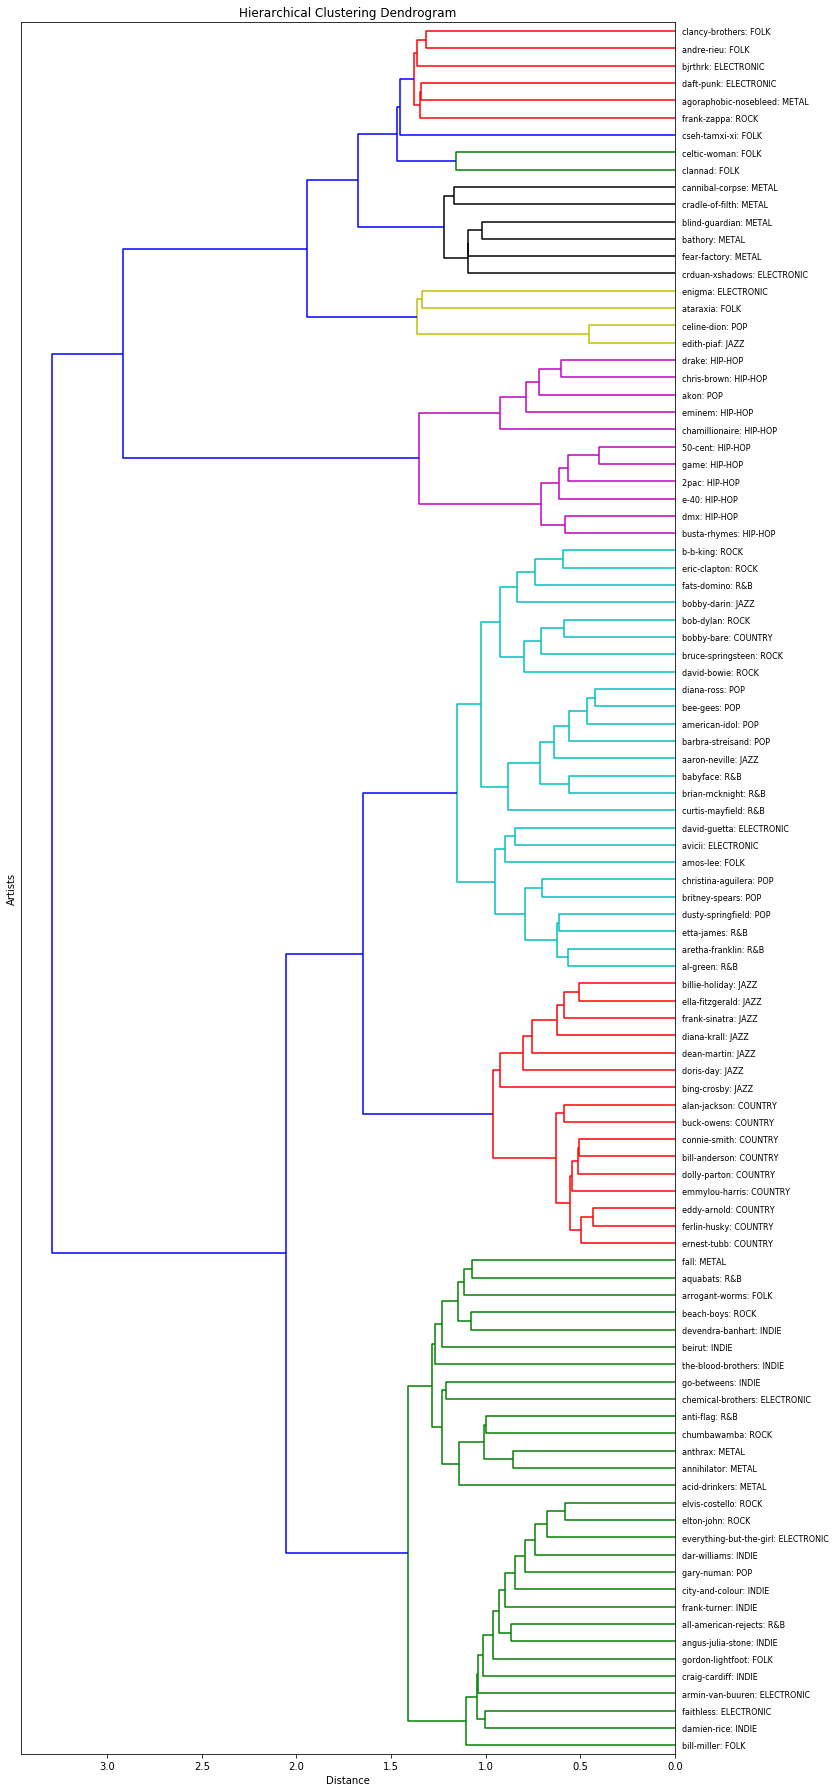

<Figure size 432x288 with 0 Axes>

In [19]:
artist_names = [a+': '+artist2genre[a].upper()
                for a in list(artist_lyrics.keys())]
plot_dendrogram(clustered, artist_names)

   ## PCA
 

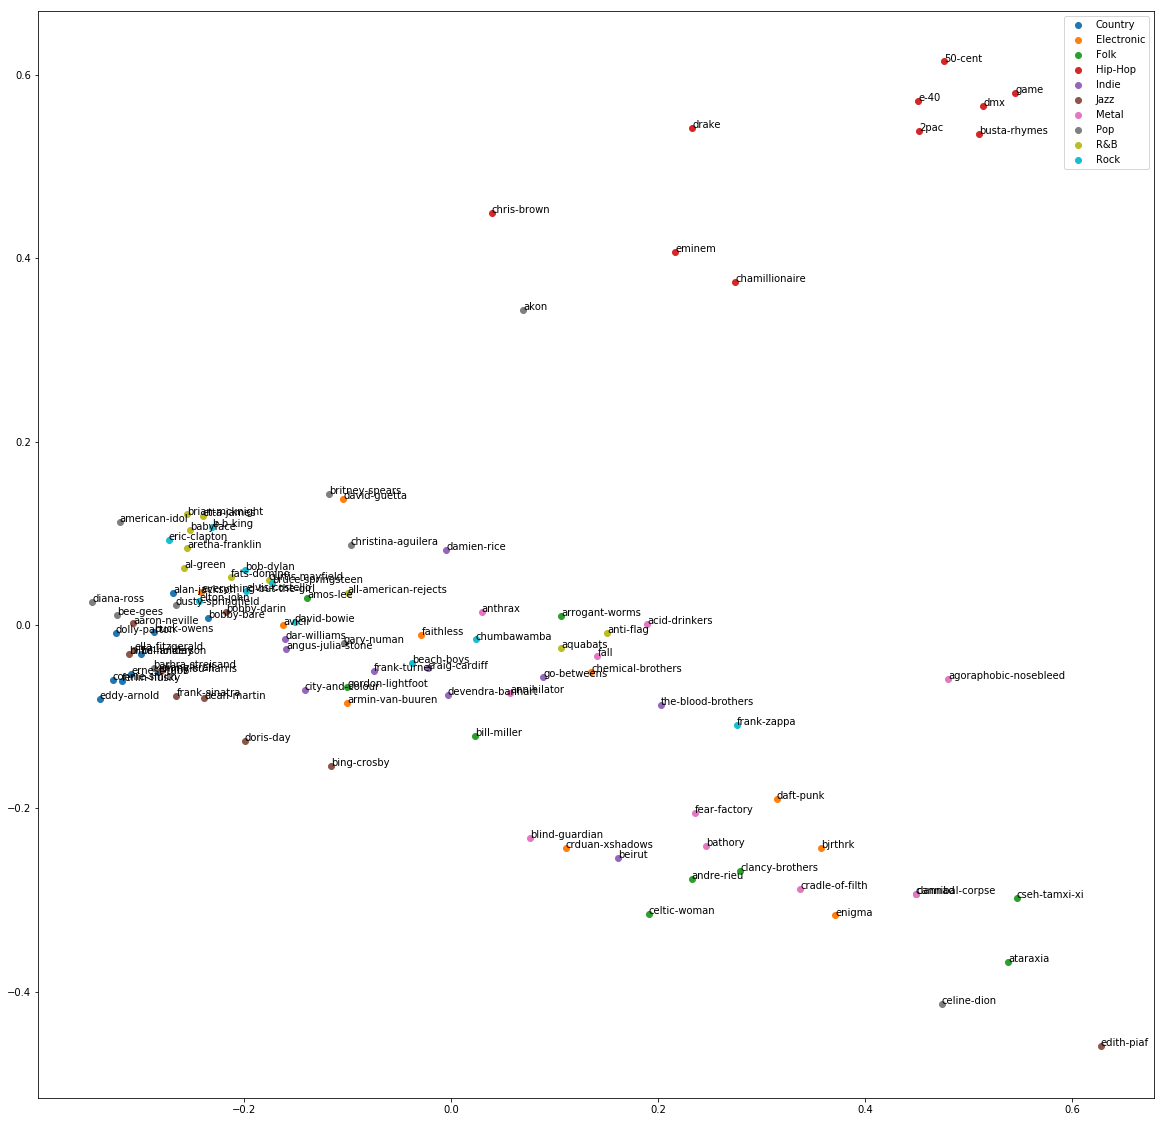

<Figure size 432x288 with 0 Axes>

In [10]:
from sklearn.decomposition import PCA
from itertools import groupby
from operator import itemgetter

fitted_model = PCA(n_components=2).fit_transform(lyrics_tfidf_matrix.toarray())

artist2pca = zip(artist_lyrics.keys(), fitted_model[:, 0], fitted_model[:,1])

# Dicts don't necessarily share the same order so we need to map the artist to genre this way
artist_genre2pca = list(map(lambda pca_entry: (artist2genre[pca_entry[0]], pca_entry[0], pca_entry[1], pca_entry[2]),
                            artist2pca))

plt.figure(figsize=(20,20))
for genre, grouped in groupby(sorted(artist_genre2pca, key=itemgetter(0)), itemgetter(0)):
    
    values = list(grouped) # Convert iterator to list which is easier to work with
    
    _, _, xs, ys = list(zip(*values))
    plt.scatter(xs, ys, label=genre)
    
    for _, artist, x, y in values:
        plt.annotate(artist,xy=(x, y))

    
plt.legend()
plt.show()
plt.clf()

# Clustering Part 2 - kMeans

Cluster the feature matrix again with kMeans. The clusters appear to be worse than they do with hierarchical clustering.

In [12]:
from sklearn.cluster import KMeans

nr_of_clusters = 10
kmeans = KMeans(n_clusters=nr_of_clusters).fit_predict(lyrics_tfidf_matrix)

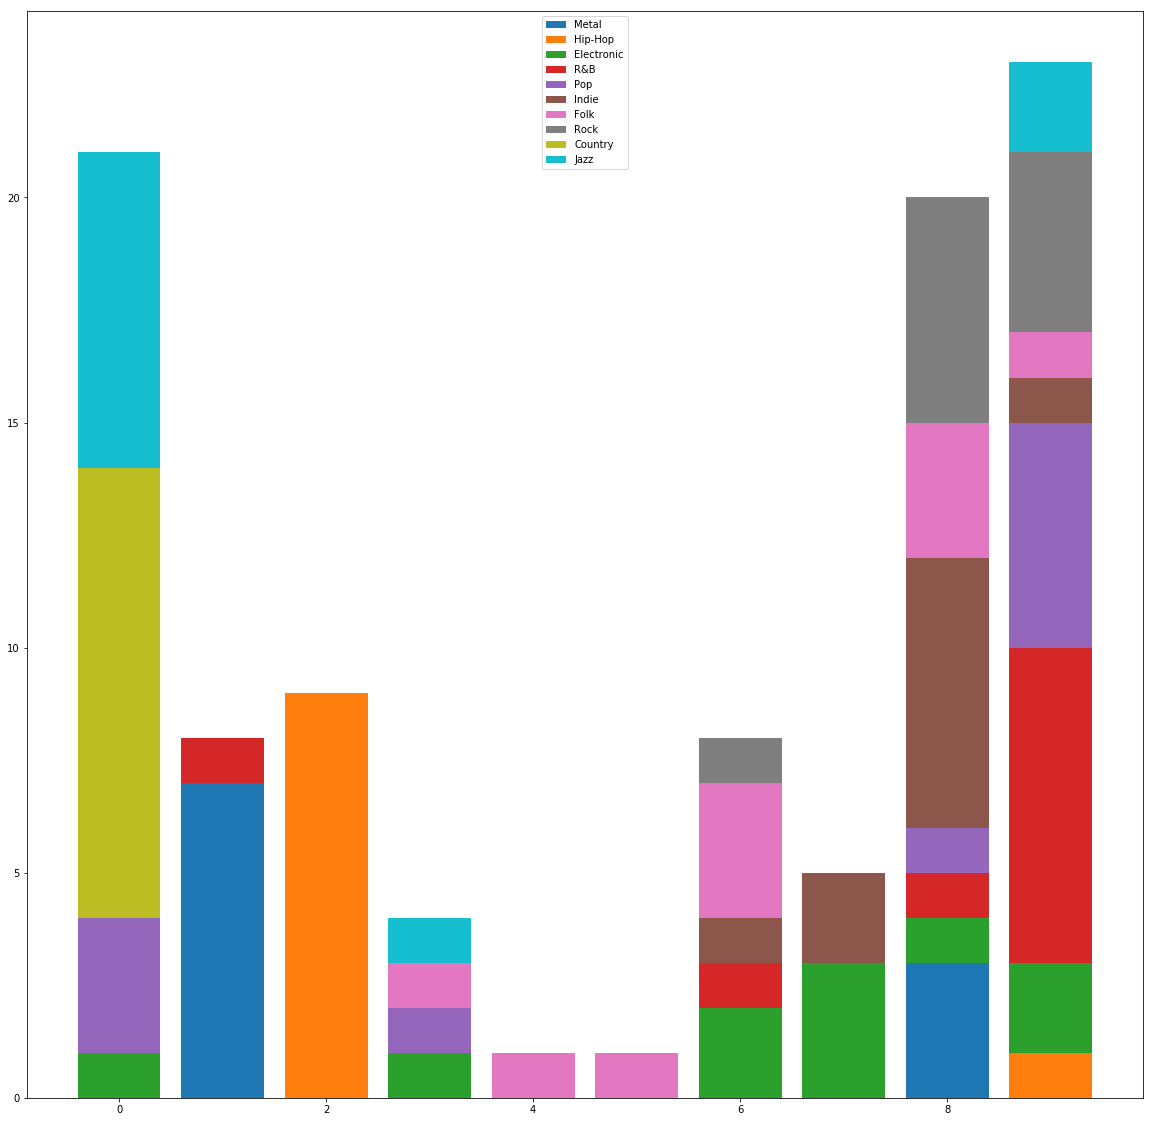

<Figure size 432x288 with 0 Axes>

In [13]:
cluster2artist = zip(kmeans, artist_lyrics.keys())
# Dicts don't necessarily share the same order so we need to map the artist to genre this way
cluster2genre = list(map(lambda item: (item[0], artist2genre[item[1]]), cluster2artist))

# Count occurences of each genre per cluster
plot_data = {}
for cluster, genre in cluster2genre:
    if genre not in plot_data:
        plot_data[genre] = [0] * nr_of_clusters
        
    plot_data[genre][cluster] += 1

# Plot the data in a bar plot
plt.figure(figsize=(20,20))

genres = [] # Keep track of genres for plot legend
ind = range(nr_of_clusters)
barstart_y = [0] * nr_of_clusters

for genre, data in plot_data.items():
    plt.bar(ind, data, bottom=barstart_y)
    barstart_y = list(map(sum, zip(data, barstart_y)))
    genres.append(genre)

plt.legend(genres)
plt.show()
plt.clf()